# Project: Investigate a Dataset - no-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


# the description of a dataset

### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

**PatientId**: Identification of a patien. <br>
**AppointmentID**: Identification of each appointmen. <br>
**Gender**: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. <br>
**ScheduledDay**: tells us on what day the patient set up their appointment. <br>
**AppointmentDay**: The day of the actuall appointment, when they have to visit the doctor. <br>
**Age**: How old is the patient. <br>
**Neighbourhood**:  indicates the location of the hospital. <br>
**Scholarship**: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. <br>
**Hipertension**: True or False <br>
**Diabetes**:  True or False <br>
**Alcoholism**:  True or False <br>
**Handcap**: True or False <br>
**SMS_received**: 1 or more messages sent to the patient.  <br>
**No-show**: indicate if the patient show upto the appiontment or not <br>
it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. <br>

# POSE SOME QUESTIONS

### 1) what is the overall appointment show-up vs. no show-up rate?
### 2) What are the properties that associated with patients that did not show up for their appointment?
### 3)Does the age affect whether patient will show up or not the ?
### 4) Is there relation between the hypertension and the age of the patients?
### 5) Is there relation between the diabetes and the age of the patients?
### 6)Does receiving sms affect the count of patients showing up?
### 7)Does the gender affect whether the patient will show or not?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in c:\users\sohaib\anaconda3\lib\site-packages (0.25.0)
Requirement not upgraded as not directly required: python-dateutil>=2.6.1 in c:\users\sohaib\anaconda3\lib\site-packages (from pandas==0.25.0) (2.7.3)
Requirement not upgraded as not directly required: pytz>=2017.2 in c:\users\sohaib\anaconda3\lib\site-packages (from pandas==0.25.0) (2018.5)
Requirement not upgraded as not directly required: numpy>=1.13.3 in c:\users\sohaib\anaconda3\lib\site-packages (from pandas==0.25.0) (1.15.1)
Requirement not upgraded as not directly required: six>=1.5 in c:\users\sohaib\anaconda3\lib\site-packages (from python-dateutil>=2.6.1->pandas==0.25.0) (1.11.0)


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 22.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<a id='wrangling'></a>
## Data Wrangling


# wrangling concists of three steps:
### 1) Gather
### 2) assessing
### 3) cleaning

### 1) Gather

In [4]:
# Load your data and print out first five lines.
df = pd.read_csv('E:\\sohayb\\jupyter\\new\\project_2_investigate_a_dataset\\new_new_folder\\noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 2) Assessing

### Perform operations to inspect our data frame and see if there is anything need to be corrected

In [5]:
# get the shape of tha df
print('the number of rows is: ',df.shape[0])
print('the number of columns is: ',df.shape[1])

the number of rows is:  110527
the number of columns is:  14


In [6]:
# check if there is any duplicates
print('the number of duplicate rows is: ',df.duplicated().sum())

the number of duplicate rows is:  0


as we can see there is no duplicated rows in the df

In [7]:
#check if there is any nan values
print('the number of nans is: ',df.isnull().sum().sum())

the number of nans is:  0


as we can see there is no nan values in the df

In [8]:
#check the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

as we can see that the number of patient ids is 62299 which means that there are (110527 - 32299) = 78228 patient that make the appintment more than once

In [9]:
#see what are the unique values of the column Handcap
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [10]:
#check the data types of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

By knowing the data types of each column i discovered that i need to change the data type of the columns(ScheduledDay  ,AppointmentDay) from object to date

In [11]:
# get some statistical information about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


from this function i noticed that age has minimum value of -1 which we discovered before and %of the ages is between 18 and 55 <br>
and about 75 % of petients has no scholarship <br> 
and about 75 % of petients has no Hipertension as same as Diabetes, Alcoholism and Handcap <br>	
there is about 25% of patients only received a message and 75% did not

In [12]:
#check if there is any age with negative values and know how many they are
negative_age = df.query('Age < 0')

print(negative_age.shape[0])
negative_age

1


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


there is only one age with negative value

In [13]:
#check if there is any age equals to zero and know how many they are
zere_age = df.query('Age == 0')
print(zere_age.shape[0])
zere_age

3539


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


and there is 3539 row with zero value

### Data Cleaning

### After discussing the structure of the data and any problems that need to be cleaned, so it is time to make perform data cleaning 


drop unnecessary columns

In [14]:
df.drop(['PatientId', 'AppointmentID'] , axis = 1 , inplace = True)

In [15]:
#confirm the change
df.shape[1]

12

we need to change the wrong labels and transform them to lower case to ease the access of them


In [16]:
#see the column labels
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [17]:
#make the change
df.rename(columns = {'Hipertension' : 'Hypertension' ,
                    'Handcap' : 'Handicap',
                    'No-show' : 'No_show'} , inplace = True )

In [18]:
#confirm the change
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show'],
      dtype='object')

In [19]:
#change to lowercase
df.columns = df.columns.str.lower()

In [20]:
#confirm the change
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

we need to chane the data type of the columns ('ScheduledDay',
       'AppointmentDay')

In [21]:
df.scheduledday = pd.to_datetime(df.scheduledday)

df.appointmentday = pd.to_datetime(df.appointmentday)

In [22]:
#confirm the change
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hypertension                    int64
diabetes                        int64
alcoholism                      int64
handicap                        int64
sms_received                    int64
no_show                        object
dtype: object

drop the row with -1 age

In [23]:
df.drop(index = 99832 , inplace = True)

In [24]:
#confirm the change
df.query('age == -1')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


fill the age with 0 values with the mean()

In [25]:
mean_age = df.age.mean()
df.age = df.age.replace(0,mean_age)

In [26]:
#confirm the change
zere_age = df.query('age == 0')
print(zere_age.shape[0])

0


as you can see there is no rows with 0 age att all

<a id='eda'></a>
## Exploratory Data Analysis

my dependant variable is (no_show)

### Research Question 1 (what is the overall appointment show-up vs. no show-up rate?)

### Plot the histograms for all columns in df

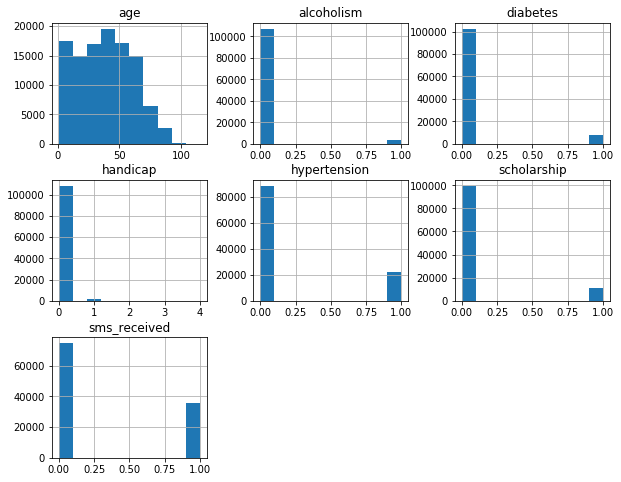

In [27]:
df.hist(figsize = (10,8));

most of the peaple do not suffer from alcholism as well as diabetes , handicap <br>
about 20 % of patients suffer from hypertension <br>
number of patients who received an sms is half of who did not <br>
about 10% of patients enrolled in has the scholarshop (Brasillian welfare program) <br>


In [28]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


divide the dataframe to 2 dataframes (one for patients that showed up (no) and the other for patients that did not show up (yes))

In [29]:
showed_df = df.query('no_show == "No" ')
not_showed_df = df.query('no_show == "Yes" ')

### Research Question 2 (what is the overall appointment show-up vs. no show-up rate?)

In [30]:
showed_df_num = showed_df.shape[0]

In [31]:
not_showed_df_num = not_showed_df.shape[0]
showed_df_num , not_showed_df_num

(88207, 22319)

there is 88207 patient showed and 22319 did not show

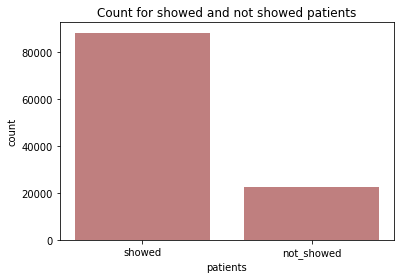

In [57]:
x_coor = ['showed' , 'not_showed']
heights = [showed_df_num , not_showed_df_num]
plt.bar(x_coor , heights, color = 'maroon', alpha = 0.5)
plt.title('Count for showed and not showed patients')
plt.xlabel('patients')
plt.ylabel('count')
plt.show()

the number of showed patients is bigger than the not_showed patients <br>
now i will plot the proportion of the patients not just thier count 

In [34]:
#get the proportion(rate)
total_patients = df.shape[0]
total_patients

110526

In [35]:
showed_prop = showed_df_num / total_patients
not_showed_prop = not_showed_df_num / total_patients
showed_prop, not_showed_prop

(0.7980656135208005, 0.20193438647919945)

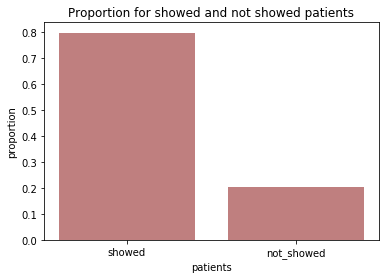

In [58]:
#show the bar for the proportion

heights_prop = [showed_prop , not_showed_prop]
plt.bar(x_coor , heights_prop, color = 'maroon', alpha = 0.5)
plt.title('Proportion for showed and not showed patients')
plt.xlabel('patients')
plt.ylabel('proportion')
plt.show()

so about 80 % of the patients showed up and about 20 % did not show

### Research Question 2  (What are the properties that associated with patients that did not show up for their appointment)

In [38]:
not_showed_df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23.0,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39.0,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29.0,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40.0,CONQUISTA,1,0,0,0,0,0,Yes
20,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30.0,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [39]:
not_showed_df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,35.379543,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,21.163066,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


so the properties are:
    the mean of their age is 35 and 11 % of them have th scholarship and 16% of them have hypertension 43 % of them have received sms.
    about 50 % oo them between 18 and 51 
    

# Research Question 3 (Does the age affect whether patient will show up or not ?)

In [40]:
showed_age_mean = showed_df.age.mean()
not_showed_age_mean = not_showed_df.age.mean()
showed_age_mean , not_showed_age_mean

(39.009894164822576, 35.37954257941832)

we can see that the age mean for people who showed is bigger than who not by just 4 years

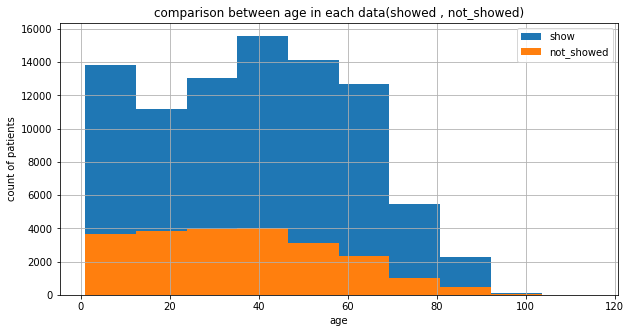

In [48]:
#figure between the ages for patients who showed and patients who did not

plt.figure(figsize = (10,5))
showed_df.age.hist( label = 'show')
not_showed_df.age.hist( label = 'not_showed')
plt.title('comparison between age in each data(showed , not_showed)')
plt.xlabel('age')        
plt.ylabel('count of patients')
plt.legend();    




in this histogram i discovered that the count of patients who showed is bigger in all ages from (1 to 100)  
and the most patients who showed is between 35 and 45  and followed by 45 to 58

### Research Question 4 (Is there relation between the hypertension and the age of the patients?)

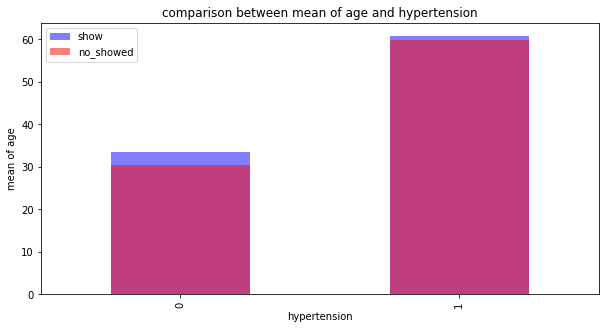

In [49]:
plt.figure(figsize = (10,5))
showed_df.groupby(['hypertension']).mean()['age'].plot(kind = 'bar',alpha = .5 , color = 'blue', label = 'show')
not_showed_df.groupby(['hypertension']).mean()['age'].plot(kind = 'bar',alpha = .5 , color = 'red', label = 'no_showed')
plt.title('comparison between mean of age and hypertension')
plt.xlabel('hypertension')
plt.ylabel('mean of age')
plt.legend()
plt.show()

i see that the mean of age for patients who showed and do not suffer from hypertnesion about 34 %<br>
and mean of age for patients who do not showed and do not suffer from hypertnesion about 30 % 

on the other hand the mean age of patients who showed and not showed and both suffer from hypertension is almost the same which is about 60 % <br>
> the important thing that there is a relation between the age and the hypertension 
>but the hypertension does not affect whether the patients will show up or not

### Research Question 5 ( Is there relation between the diabetes and the age of the patients?)

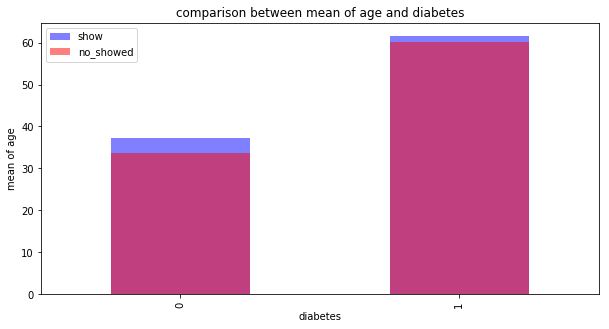

In [50]:
plt.figure(figsize = (10,5))
showed_df.groupby(['diabetes']).mean()['age'].plot(kind = 'bar',alpha = .5 , color = 'blue', label = 'show')
not_showed_df.groupby(['diabetes']).mean()['age'].plot(kind = 'bar',alpha = .5 , color = 'red', label = 'no_showed')
plt.title('comparison between mean of age and diabetes')
plt.xlabel('diabetes')
plt.ylabel('mean of age')
plt.legend()
plt.show()

i see that the mean of age for patients who showed and do not suffer from diabetes about 38 % <br>
and mean of age for patients who do not showed and do not suffer from diabetes about 33 % 

on the other hand the mean age of patients who showed and not showed and both suffer from diabetes is almost the same which is about 60 % <br>
> the important thing that there is a relation between the age and the diabetes 
>but the diabetes does not affect whether the patients will show up or not

# Research Question 6 (Does receiving sms affect the count of patients showing up?)

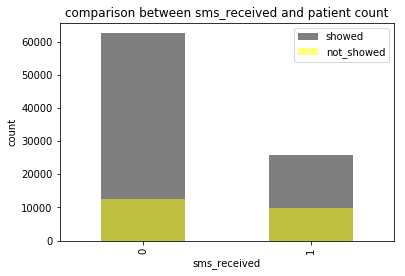

In [51]:
#plot a barchart between sms_received column for each showed and not showed patients
showed_df.sms_received.value_counts().plot( kind = 'bar', alpha = 0.5 ,color = 'black' , label = 'showed')
not_showed_df.sms_received.value_counts().plot( kind = 'bar' ,alpha = 0.5 ,color = 'yellow' , label = 'not_showed')
plt.title('comparison between sms_received and patient count')
plt.xlabel('sms_received')
plt.ylabel('count')
plt.legend()
plt.show()

i discovered something weird in this figure which is the patients who did not receive an sms showed more than patients who did

# Research Question 8 (Does the gender affect whether the patient will show or not?)

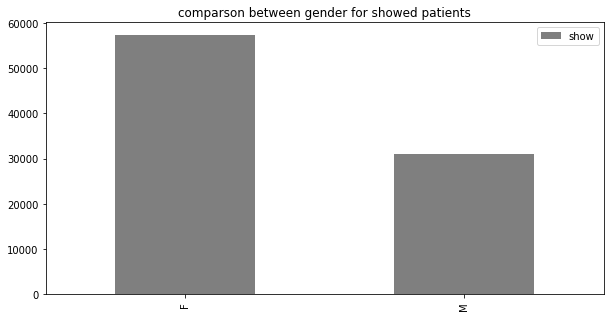

In [53]:
#plot bar for gender for showing patients  
plt.figure(figsize=(10,5))
showed_df.gender.value_counts().plot(kind = 'bar' , label = 'show', color = 'black' , alpha = 0.5)
plt.title('comparson between gender for showed patients')
plt.legend()
plt.show();

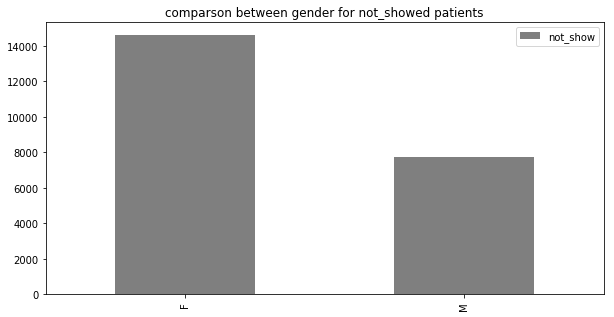

In [55]:
#plot a pie chart for gender for not_showing patients  
plt.figure(figsize=(10,5))
not_showed_df.gender.value_counts().plot(kind = 'bar' , label = 'not_show' , color = 'black', alpha = 0.5)
plt.title('comparson between gender for not_showed patients')
plt.legend()
plt.show();

as we can see there is no difference between the showed and no showed patients if we compared them by gender 
> so the gender has no effect on the attendance of patient

## Conclusions

The number of showed patients is greater than the number who did not in total <br>
for age the most patients who showed is between 35 and 45  and followed by 45 to 58 and after 70 the number of patients decreased  <br>
there is a relation between the hypertension and the mean age but this does not mean that the hypertension affect whether the patient will show up or not (`correlation does not mean causation`) <br>
there is a relation between the diabetes and the mean age but this does not mean that the diabetes affect whether the patient will show up or not (`correlation does not mean causation`) <br>
number of showing patients that did not receive sms is greater than number of those who did which is weird BTW <br>

# Limitations
could not detect direct correlation between patients showing ,no_showing and other characteretics like gender , hypertension and diabetes

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0